In [1]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import pandas as pd

Using TensorFlow backend.


In [79]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import scipy
matplotlib.rcParams['figure.figsize'] = [15, 15]

In [89]:
import keras
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Input, Softmax
from keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from keras.layers import LeakyReLU

In [121]:
image_gen = ImageDataGenerator(validation_split=0.15, rescale=1.0/255.0, width_shift_range=4, height_shift_range=4, zoom_range=0.15)
dataframe = pd.read_csv("characters/labels.txt", delim_whitespace=True)
all_dataframe = pd.read_csv("../assets/data/characters/labels.txt", delim_whitespace=True)

In [122]:
training_generator = image_gen.flow_from_dataframe(
    dataframe=all_dataframe, 
    directory="../assets/data/characters/",
    x_col="filename",
    y_col="category",
    subset="training",
    batch_size=20,
    classes=None,
    class_mode="categorical",
    shuffle=True,
    target_size=(36, 36)
)

Found 4420 validated image filenames belonging to 26 classes.


In [123]:
validation_generator = image_gen.flow_from_dataframe(
    dataframe=all_dataframe, 
    directory="../assets/data/characters/",
    x_col="filename",
    y_col="category",
    subset="validation",
    batch_size=20,
    classes=None,
    class_mode="categorical",
    shuffle=True,
    target_size=(36, 36)
)

Found 780 validated image filenames belonging to 26 classes.


In [104]:
input_shape = (36, 36, 3)
alpha = 0.2

inputs = Input(shape=input_shape)

x = Conv2D(16, (3, 3))(inputs)
x = LeakyReLU(alpha)(x)
x = MaxPooling2D((2, 2))(x)

x = SeparableConv2D(32, (3, 3))(x)
x = LeakyReLU(alpha)(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3))(x)
x = LeakyReLU(alpha)(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)

x = Dense(64)(x)
x = LeakyReLU(alpha)(x)

x = Dense(26, activation="softmax")(x)
outputs = x

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=keras.optimizers.Adam(lr=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [105]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 36, 36, 3)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 16)        448       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 34, 34, 16)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 17, 17, 16)        0         
_________________________________________________________________
separable_conv2d_13 (Separab (None, 15, 15, 32)        688       
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 15, 15, 32)        0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 32)          0   

In [125]:
steps_per_epoch = training_generator.n//training_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

model.fit_generator(
    generator=training_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=10,
)

Epoch 1/10
221/221 [==============================] - 7s 34ms/step - loss: 0.1782 - accuracy: 0.9382 - val_loss: 0.3539 - val_accuracy: 0.9577
Epoch 2/10
221/221 [==============================] - 7s 33ms/step - loss: 0.1679 - accuracy: 0.9403 - val_loss: 0.0210 - val_accuracy: 0.9410
Epoch 3/10
221/221 [==============================] - 7s 33ms/step - loss: 0.1526 - accuracy: 0.9410 - val_loss: 0.0605 - val_accuracy: 0.9679
Epoch 4/10
221/221 [==============================] - 7s 33ms/step - loss: 0.1549 - accuracy: 0.9428 - val_loss: 0.0659 - val_accuracy: 0.9474
Epoch 5/10
221/221 [==============================] - 7s 32ms/step - loss: 0.1505 - accuracy: 0.9441 - val_loss: 0.0133 - val_accuracy: 0.9474
Epoch 6/10
221/221 [==============================] - 7s 33ms/step - loss: 0.1446 - accuracy: 0.9457 - val_loss: 0.2940 - val_accuracy: 0.9410
Epoch 7/10
221/221 [==============================] - 7s 33ms/step - loss: 0.1402 - accuracy: 0.9489 - val_loss: 0.0298 - val_accuracy: 0.9218

In [126]:
model.save("characters.h5")

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]]
[ 0 25]


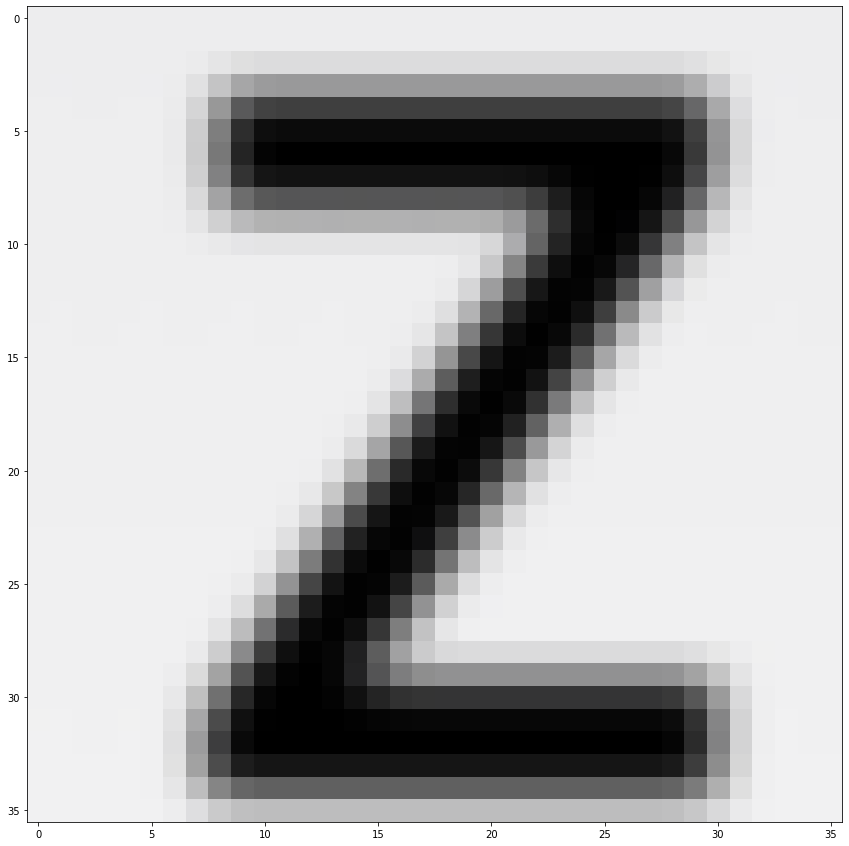

In [127]:
other_image = cv2.imread("../assets/data/characters/sample_0.png")
image = cv2.imread("../assets/data/characters/sample_4705.png")
data = np.array([other_image, image])
prediction = model.predict(data)
print(prediction)
print(np.argmax(prediction, axis=1))
plt.imshow(image)